In [1]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install pyLDAvis

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.6 MB 4.2 MB/s eta 0:00:01
   ---------------------------- ----------- 1.8/2.6 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install WordCloud

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')  # Для токенизации (если используете word_tokenize)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Denis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Denis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [24]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Denis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import re
import nltk
import gensim
import pymorphy3

from sklearn.decomposition import NMF
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('imdb_top250_full.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        250 non-null    object 
 1   description  249 non-null    object 
 2   rating       250 non-null    float64
 3   time         245 non-null    object 
 4   genre        250 non-null    object 
 5   year         250 non-null    int64  
 6   country      250 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.8+ KB


In [3]:
df.head()

,title,description,rating,time,genre,year,country
0,"Назад в будущее(фильм, 1985)","Марти МакФлай, типичный американский тинейджер...",8.5,1 час 48 минут,"комедия ,приключения ,фантастика ,",1985,США
1,"Вечное сияние чистого разума(фильм, 2004)",Застенчивый и меланхоличный Джоэл живёт ничем ...,8.3,1 час 43 минуты,"драма ,мелодрама ,фантастика ,",2004,США
2,"Меланхолия(фильм, 2011)","События фильма разворачиваются в дни, которые ...",7.1,2 часа 15 минут,"драма ,фантастика ,Дания ,Швеция ,Франция ,",2011,Германия
3,"Москва-Кассиопея(фильм, 1973)",Из глубин Вселенной до Земли долетает радиосиг...,6.6,1 час 23 минуты,"приключения ,семейный ,фантастика ,",1973,СССР
4,"Интерстеллар(фильм, 2014)","Когда засуха, пыльные бури и вымирание растени...",8.7,2 часа 49 минут,"драма ,приключения ,фантастика ,США ,Великобри...",2014,Канада


In [4]:
df['description'] = df['description'].fillna('Unknown')

In [5]:
st = '\xa0'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

df['prep_text']= [remove_othersymbol(text.lower()) for text in df['description']]

In [6]:
def remove_punctuation(text):
    return ''.join([ch for ch in text if ch not in string.punctuation])
df['prep_text']= [remove_punctuation(text) for text in df['prep_text']]

In [7]:
df.head()

,title,description,rating,time,genre,year,country,prep_text
0,"Назад в будущее(фильм, 1985)","Марти МакФлай, типичный американский тинейджер...",8.5,1 час 48 минут,"комедия ,приключения ,фантастика ,",1985,США,марти макфлай типичный американский тинейджер ...
1,"Вечное сияние чистого разума(фильм, 2004)",Застенчивый и меланхоличный Джоэл живёт ничем ...,8.3,1 час 43 минуты,"драма ,мелодрама ,фантастика ,",2004,США,застенчивый и меланхоличный джоэл живёт ничем ...
2,"Меланхолия(фильм, 2011)","События фильма разворачиваются в дни, которые ...",7.1,2 часа 15 минут,"драма ,фантастика ,Дания ,Швеция ,Франция ,",2011,Германия,события фильма разворачиваются в дни которые п...
3,"Москва-Кассиопея(фильм, 1973)",Из глубин Вселенной до Земли долетает радиосиг...,6.6,1 час 23 минуты,"приключения ,семейный ,фантастика ,",1973,СССР,из глубин вселенной до земли долетает радиосиг...
4,"Интерстеллар(фильм, 2014)","Когда засуха, пыльные бури и вымирание растени...",8.7,2 часа 49 минут,"драма ,приключения ,фантастика ,США ,Великобри...",2014,Канада,когда засуха пыльные бури и вымирание растений...


In [8]:
russian_stopwords = stopwords.words("russian") 

In [9]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

lemm_texts_list = []
for text in (df['prep_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['text_lemm'] = lemm_texts_list

In [10]:
df.head()

,title,description,rating,time,genre,year,country,prep_text,text_lemm
0,"Назад в будущее(фильм, 1985)","Марти МакФлай, типичный американский тинейджер...",8.5,1 час 48 минут,"комедия ,приключения ,фантастика ,",1985,США,марти макфлай типичный американский тинейджер ...,марти макфлай типичный американский тинейджер ...
1,"Вечное сияние чистого разума(фильм, 2004)",Застенчивый и меланхоличный Джоэл живёт ничем ...,8.3,1 час 43 минуты,"драма ,мелодрама ,фантастика ,",2004,США,застенчивый и меланхоличный джоэл живёт ничем ...,застенчивый и меланхоличный джоэл жить ничто н...
2,"Меланхолия(фильм, 2011)","События фильма разворачиваются в дни, которые ...",7.1,2 часа 15 минут,"драма ,фантастика ,Дания ,Швеция ,Франция ,",2011,Германия,события фильма разворачиваются в дни которые п...,событие фильм разворачиваться в день который п...
3,"Москва-Кассиопея(фильм, 1973)",Из глубин Вселенной до Земли долетает радиосиг...,6.6,1 час 23 минуты,"приключения ,семейный ,фантастика ,",1973,СССР,из глубин вселенной до земли долетает радиосиг...,из глубина вселенная до земля долетать радиоси...
4,"Интерстеллар(фильм, 2014)","Когда засуха, пыльные бури и вымирание растени...",8.7,2 часа 49 минут,"драма ,приключения ,фантастика ,США ,Великобри...",2014,Канада,когда засуха пыльные бури и вымирание растений...,когда засуха пыльный буря и вымирание растение...


In [11]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

df['tokenize_text'] = [tokenize(text) for text in df['text_lemm']]

In [12]:
df.head()

,title,description,rating,time,genre,year,country,prep_text,text_lemm,tokenize_text
0,"Назад в будущее(фильм, 1985)","Марти МакФлай, типичный американский тинейджер...",8.5,1 час 48 минут,"комедия ,приключения ,фантастика ,",1985,США,марти макфлай типичный американский тинейджер ...,марти макфлай типичный американский тинейджер ...,марти макфлай типичный американский тинейджер ...
1,"Вечное сияние чистого разума(фильм, 2004)",Застенчивый и меланхоличный Джоэл живёт ничем ...,8.3,1 час 43 минуты,"драма ,мелодрама ,фантастика ,",2004,США,застенчивый и меланхоличный джоэл живёт ничем ...,застенчивый и меланхоличный джоэл жить ничто н...,застенчивый меланхоличный джоэл жить ничто при...
2,"Меланхолия(фильм, 2011)","События фильма разворачиваются в дни, которые ...",7.1,2 часа 15 минут,"драма ,фантастика ,Дания ,Швеция ,Франция ,",2011,Германия,события фильма разворачиваются в дни которые п...,событие фильм разворачиваться в день который п...,событие фильм разворачиваться день который пре...
3,"Москва-Кассиопея(фильм, 1973)",Из глубин Вселенной до Земли долетает радиосиг...,6.6,1 час 23 минуты,"приключения ,семейный ,фантастика ,",1973,СССР,из глубин вселенной до земли долетает радиосиг...,из глубина вселенная до земля долетать радиоси...,глубина вселенная земля долетать радиосигнал р...
4,"Интерстеллар(фильм, 2014)","Когда засуха, пыльные бури и вымирание растени...",8.7,2 часа 49 минут,"драма ,приключения ,фантастика ,США ,Великобри...",2014,Канада,когда засуха пыльные бури и вымирание растений...,когда засуха пыльный буря и вымирание растение...,засуха пыльный буря вымирание растение приводи...


In [14]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

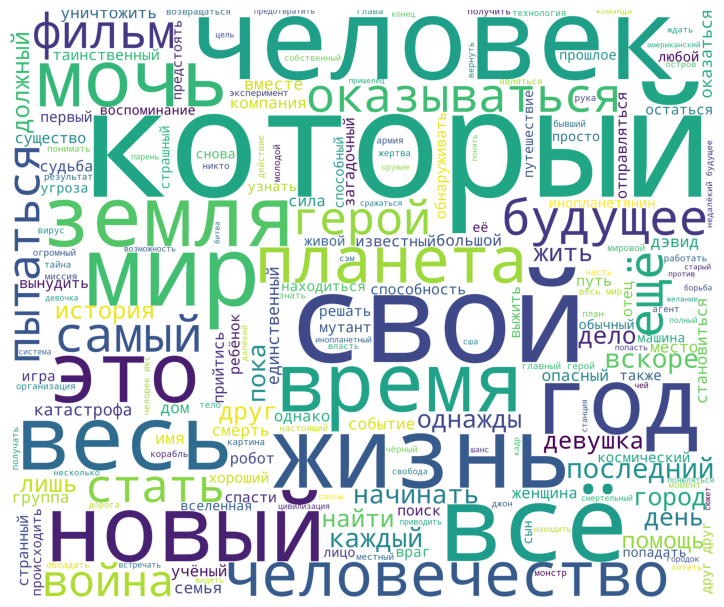

In [15]:
corpus = get_corpus(df['tokenize_text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

In [16]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

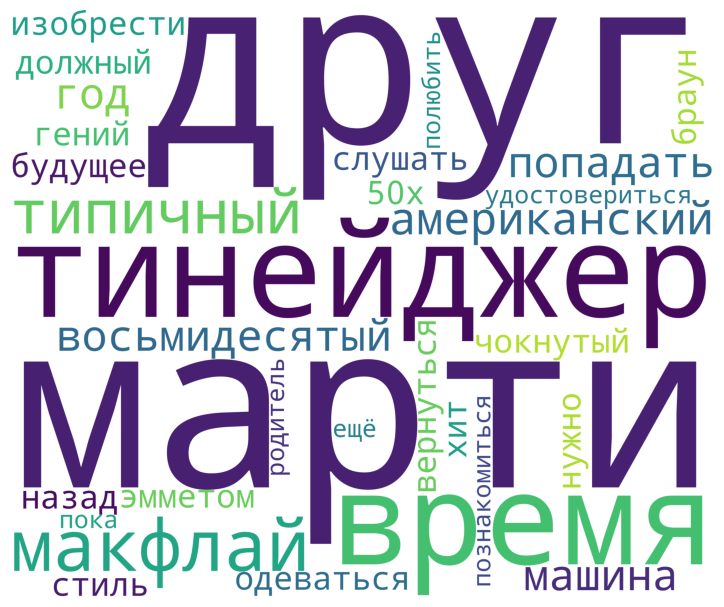

In [17]:
corpus = df['tokenize_text'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

In [18]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['tokenize_text'])

vectorizer.get_feature_names_out()[160:200]

array(['вина', 'виновный', 'виртуальный', 'вирус', 'включая', 'владелец',
       'владеть', 'владимир', 'власть', 'влияние', 'влиятельный',
       'влюбить', 'вместе', 'вместе предстоять', 'вместо', 'внезапно',
       'внезапный', 'внеземной', 'внеземной жизнь',
       'внеземной цивилизация', 'внешний', 'внешний мир', 'внимание',
       'внимание оказаться', 'вновь', 'вовлечь', 'вода', 'военный',
       'возвратить', 'возвращать', 'возвращаться', 'возвращаться домой',
       'возвращение', 'возглавить', 'воздух', 'возлюбить',
       'возлюбить гвено', 'возможно', 'возможность', 'возможный'],
      dtype=object)

In [19]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokenize_text'])

tfidf_vectorizer.get_feature_names_out()[150:160]

array(['выиграть', 'выйти', 'вымирание', 'вынудить', 'вынуждать',
       'вынужденный', 'выполнять', 'выпустить', 'высокий',
       'высокотехнологичный'], dtype=object)

In [21]:
def tokenize2(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return tokens
    
df['tokenize_text2'] = [tokenize2(text) for text in df['tokenize_text']]

In [24]:
gensim_dictionary = gensim.corpora.Dictionary(df['tokenize_text2'])
gensim_dictionary.filter_extremes(no_above=0.1, no_below=5)
gensim_dictionary.compactify()

In [25]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df['tokenize_text2']]

In [30]:
lda_20 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=24, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

lda_20.print_topics()

[(6,
  '0.024*"глобальный" + 0.024*"поиск" + 0.018*"предотвратить" + 0.018*"часть" + 0.018*"катастрофа" + 0.017*"город" + 0.012*"капитан" + 0.012*"вода" + 0.012*"проект" + 0.012*"недалёкий"'),
 (8,
  '0.024*"корабль" + 0.021*"дэвид" + 0.018*"катастрофа" + 0.018*"питер" + 0.018*"место" + 0.014*"способность" + 0.012*"каждый" + 0.012*"путь" + 0.012*"главный" + 0.012*"единственный"'),
 (4,
  '0.030*"единственный" + 0.030*"станция" + 0.028*"становиться" + 0.020*"захватить" + 0.020*"искусственный" + 0.020*"деньга" + 0.020*"имя" + 0.020*"дело" + 0.018*"убийца" + 0.010*"женщина"'),
 (20,
  '0.035*"остров" + 0.024*"единственный" + 0.024*"компания" + 0.024*"видеть" + 0.023*"слышать" + 0.023*"внеземной" + 0.012*"пока" + 0.012*"опасный" + 0.012*"история" + 0.012*"разумный"'),
 (0,
  '0.032*"решать" + 0.026*"семья" + 0.026*"собственный" + 0.020*"инопланетянин" + 0.020*"выжить" + 0.019*"желание" + 0.016*"угроза" + 0.013*"полный" + 0.013*"далёкий" + 0.013*"мировой"'),
 (9,
  '0.017*"мутант" + 0.014*"

In [31]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_20,
                                     texts=df["tokenize_text2"],
                                     dictionary=gensim_dictionary,
                                     coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()

print("\nCoherence Score: ", coherence_lda)


Coherence Score:  0.34664234982446146


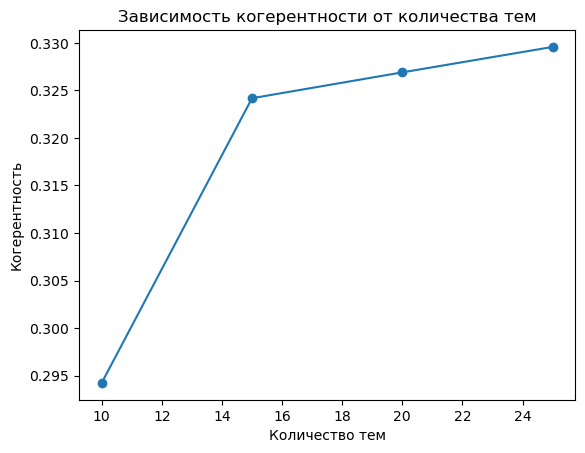

In [29]:
coherence_values = []
for num_topics in range(10, 30, 5):  # Перебираем разное количество тем
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                             num_topics=num_topics,
                             id2word=gensim_dictionary,
                             passes=10,
                             random_state=6457)
    
    coherence_model = CoherenceModel(model=lda_model,
                                     texts=df["tokenize_text2"],
                                     dictionary=gensim_dictionary,
                                     coherence="c_v")
    
    coherence_values.append(coherence_model.get_coherence())

# Построение графика
import matplotlib.pyplot as plt

plt.plot(range(10, 30, 5), coherence_values, marker='o')
plt.xlabel("Количество тем")
plt.ylabel("Когерентность")
plt.title("Зависимость когерентности от количества тем")
plt.show()

In [32]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [33]:
vis_20 = gensimvis.prepare(lda_20, corpus, gensim_dictionary)
pyLDAvis.enable_notebook()
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
16     0.046565 -0.047454       1        1  7.172599
22    -0.060092  0.073517       2        1  6.798424
9     -0.005670  0.016551       3        1  6.783265
8      0.060037 -0.034670       4        1  6.567918
23     0.019874  0.077859       5        1  6.001209
3     -0.079570  0.063719       6        1  5.632126
18     0.051700 -0.062682       7        1  5.266282
13     0.072379 -0.106072       8        1  4.953956
2     -0.007792 -0.051632       9        1  4.910649
7      0.125099  0.118287      10        1  4.497296
15    -0.046136 -0.106861      11        1  4.331069
21     0.041083 -0.092752      12        1  4.011525
1     -0.086629  0.014783      13        1  3.862243
17     0.054012 -0.053049      14        1  3.601387
11    -0.063782 -0.031182      15        1  3.536838
14    -0.041246 -0.001318      16        1  3.201376
19     0.171388  0.137871      17        1  3.198463
6     -0.057625  0.094017      18        1  3.093410
5      0.035913 -0.103151      19        1  2.797685
0     -0.116042  0.000420      20        1  2.791503
10    -0.128584  0.016560      21        1  1.873846
4     -0.069712  0.064892      22        1  1.818512
12     0.035666 -0.045524      23        1  1.796522
20     0.049163  0.057872      24        1  1.501897, topic_info=             Term       Freq      Total Category  logprob  loglift
322  единственный  23.000000  23.000000  Default  30.0000  30.0000
398        остров  10.000000  10.000000  Default  29.0000  29.0000
28     катастрофа  19.000000  19.000000  Default  28.0000  28.0000
46        корабль  20.000000  20.000000  Default  27.0000  27.0000
375         дэвид  19.000000  19.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
32         первый   0.860117  16.316800  Topic24  -4.4196   1.2556
47    космический   0.860117  21.607483  Topic24  -4.4196   0.9747
61        большой   0.860117  17.960535  Topic24  -4.4196   1.1596
327  обнаруживать   0.860117  17.266870  Topic24  -4.4196   1.1990
192  человеческий   0.860117  11.649886  Topic24  -4.4196   1.5925

[1127 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
357       4  0.084949  агент
357       5  0.254846  агент
357       7  0.169898  агент
357       8  0.084949  агент
357       9  0.084949  агент
...     ...       ...    ...
104      16  0.035750      —
104      19  0.035750      —
104      20  0.035750      —
104      22  0.035750      —
104      23  0.035750      —

[3117 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 23, 10, 9, 24, 4, 19, 14, 3, 8, 16, 22, 2, 18, 12, 15, 20, 7, 6, 1, 11, 5, 13, 21])

In [38]:
# создание модели LDA
lda_model = LatentDirichletAllocation(n_components=20, random_state=0)
lda_model.fit(count_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: который, человек, свой, весь, пытаться, жизнь, главный, мир, всё, фильм
Topic 1: который, год, свой, новый, весь, женщина, стать, будущее, это, земля
Topic 2: который, земля, свой, мир, всё, армия, вернуть, оказаться, мочь, капитан
Topic 3: который, свой, человек, всё, корабль, мир, земля, планета, космический, время
Topic 4: всё, свой, который, новый, мир, жизнь, человек, время, игра, мочь
Topic 5: который, жизнь, это, мочь, человек, фильм, смерть, год, мир, свой
Topic 6: это, весь, мочь, дэвид, который, мир, человек, новый, всё, собственный
Topic 7: который, человек, свой, год, всё, человечество, весь, это, мир, время
Topic 8: который, человек, свой, оказываться, город, планета, новый, должный, мир, девушка
Topic 9: который, свой, жизнь, год, человек, друг, мир, всё, весь, время


In [39]:
#датафрейм для ключевых слов каждой темы
topic_keywords = pd.DataFrame()
for i,topic in enumerate(lda_model.components_):
    topic_keywords[f'Topic {i + 1}'] = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-50:]]
topic_keywords

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,предотвратить,обнаруживать,человеческий,животное,получить,прийтись,единственный,чёрный,нарушать,видеть
1,известный,вирус,пара,ксавье,решить,попасть,находить,икс,всё,китнисса
2,катастрофа,отец,который мочь,живой,большой,большой,лицо,человек икс,последний,узнать
3,бывший,шаг,странный,корпорация,загадочный,деньга,пока,помочь,однажды,бог
4,собственный,целый,мировой,власть,отправляться,первый,лишь,агент,время,воспоминание
5,имя,взять,мера,бояться,человечество,тело,жить,жертва,каждый,работать
6,главный герой,мальчик,мститель,мировой,друг друг,конец,уничтожить,загадочный,попадать,конец
7,сюжет,появиться,будущее,миссия,команда,гость,обычный,фильм,встречать,земля
8,тайна,компания,назад,могущественный,обычный,прошлый,пытаться,группа,таинственный,главный
9,жить,местность,вместе,девочка,последний,единственный,год,предстоять,возлюбить,найти


In [42]:
# создание модели NMF
nmf_model = NMF(n_components=5, random_state=0)
nmf_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: который, всё, человек, свой, мочь, мир, весь, жизнь, будущее, год
Topic 1: друг, друг друг, время, начинать, год, война, обитатель, камера, готовый, машина
Topic 2: планета, корабль, космический, земля, экипаж, космический корабль, год, инопланетянин, путешествие, который
Topic 3: мутант, икс, человек икс, человек, профессор, ксавье, мир, чарльз ксавье, чарльз, эволюция
Topic 4: питер, новый, паркер, питер паркер, мститель, жизнь, свой, человекапаук, супергерой, герой


In [44]:
# создание модели LSA
lsa_model = TruncatedSVD(n_components=5, random_state=0)
lsa_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: который, свой, человек, всё, мир, год, жизнь, весь, новый, время
Topic 1: друг, друг друг, год, время, космический, корабль, обитатель, камера, начинать, машина время
Topic 2: планета, корабль, космический, земля, космический корабль, экипаж, человечество, инопланетянин, учёный, год
Topic 3: питер, жизнь, паркер, питер паркер, новый, пытаться, мститель, отец, человекапаук, корабль
Topic 4: друг, мутант, корабль, икс, человек икс, мститель, планета, новый, первый, история


In [47]:
num_clusters = 5

# Метод к-средних - KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

KMeans(n_clusters=5)

In [48]:
idx = km.fit(tfidf_matrix)
clusters = km.labels_.tolist()


In [49]:
clusterkm = km.labels_.tolist()
df['cluster']= clusterkm

In [50]:
df[df['cluster']==4]

,title,description,rating,time,genre,year,country,prep_text,text_lemm,tokenize_text,tokenize_text2,cluster
6,"Она(фильм, 2013)","Теодор — одинокий писатель, покупает новую тех...",8.0,2 часа 6 минут,"драма ,мелодрама ,фантастика ,",2013,США,теодор — одинокий писатель покупает новую техн...,теодор — одинокий писатель покупать новый техн...,теодор — одинокий писатель покупать новый техн...,"[теодор, —, одинокий, писатель, покупать, новы...",0
9,"Первый мститель: Противостояние(фильм, 2016)",Мстители под руководством Капитана Америки ока...,7.8,2 часа 27 минут,"боевик ,приключения ,фантастика ,",2016,США,мстители под руководством капитана америки ока...,мститель под руководство капитан америка оказы...,мститель руководство капитан америка оказывать...,"[мститель, руководство, капитан, америка, оказ...",0
17,"Мстители: Война бесконечности(фильм, 2018)",Пока Мстители и их союзники продолжают защищат...,8.4,3 часа 1 минута,"боевик ,приключения ,фантастика ,",2018,США,пока мстители и их союзники продолжают защищат...,пока мститель и они союзник продолжать защищат...,пока мститель союзник продолжать защищать мир ...,"[пока, мститель, союзник, продолжать, защищать...",0
23,"Прибытие(фильм, 2016)",Неожиданное появление неопознанных летающих об...,7.9,2 часа 44 минуты,"драма ,фантастика ,США ,",2016,Канада,неожиданное появление неопознанных летающих об...,неожиданный появление неопознанный летать объе...,неожиданный появление неопознанный летать объе...,"[неожиданный, появление, неопознанный, летать,...",0
30,"Первый мститель: Другая война(фильм, 2014)","После беспрецедентных событий, впервые собравш...",7.7,2 часа 16 минут,"боевик ,приключения ,фантастика ,",2014,США,после беспрецедентных событий впервые собравши...,после беспрецедентный событие впервые собрать ...,беспрецедентный событие впервые собрать вместе...,"[беспрецедентный, событие, впервые, собрать, в...",0
33,"Эффект бабочки(фильм, 2004)","Мальчик Эван перенял от своего отца-психопата,...",7.6,1 час 45 минут,"драма ,триллер ,фантастика ,США ,",2004,Канада,мальчик эван перенял от своего отцапсихопата н...,мальчик эван перенять от свой отцапсихопат нын...,мальчик эван перенять свой отцапсихопат ныне з...,"[мальчик, эван, перенять, свой, отцапсихопат, ...",0
36,"Исходный код(фильм, 2011)",Солдат по имени Коултер мистическим образом ок...,7.5,1 час 33 минуты,"боевик ,детектив ,драма ,триллер ,фантастика ,...",2011,Германия,солдат по имени коултер мистическим образом ок...,солдат по имя коултереть мистический образ ока...,солдат имя коултереть мистический образ оказыв...,"[солдат, имя, коултереть, мистический, образ, ...",0
39,"Мстители: Эра Альтрона(фильм, 2015)",После распада организации Щ.И.Т. Тони Старк ре...,7.3,2 часа 21 минута,"боевик ,приключения ,фантастика ,",2015,США,после распада организации щит тони старк решае...,после распад организация щит тони старк решать...,распад организация щит тони старк решать созда...,"[распад, организация, щит, тони, старк, решать...",0
40,"Люди Икс(фильм, 2000)","Они - дети атомного века, сверх люди, новое зв...",7.3,1 час 44 минуты,"боевик ,приключения ,фантастика ,",2000,США,они дети атомного века сверх люди новое звено...,они ребёнок атомный век сверх человек новый зв...,ребёнок атомный век сверх человек новый звено ...,"[ребёнок, атомный, век, сверх, человек, новый,...",0
52,"Автостопом по Галактике(фильм, 2005)","По культовой книге Дугласа Адамса ""Автостопом ...",6.7,1 час 49 минут,"комедия ,приключения ,фантастика ,",2005,США,по культовой книге дугласа адамса автостопом п...,по культовый книга дуглас адамс автостоп по га...,культовый книга дуглас адамс автостоп галактик...,"[культовый, книга, дуглас, адамс, автостоп, га...",0
